**SCRAPING DATA FROM SKYTRAX**

In [32]:
#import required libraries
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [33]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 50
page_size = 100

reviews = []
rating_score = []
date = []
country = []
review_details = []


# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    soup = BeautifulSoup(response.content, "html.parser")
    for item in soup.find_all("div", class_="text_content"):
        reviews.append(item.text)

    for item in soup.find_all("div", class_ = "rating-10"):
        try:
            rating_score.append(item.span.text)
        except:
            print(f"Error on page {i}")
            rating_score.append("None")

    #date
    for item in soup.find_all("time"):
        date.append(item.text)

    #country
    for item in soup.find_all("h3"):
        country.append(item.span.next_sibling.text.strip(" ()"))

    #rating stats

    for review in soup.find_all('div', class_='body'):
        review_data = {}
        ratings = review.find('table', class_='review-ratings')

        #categories list
        cat_list = ['type_of_traveller', 'cabin_flown', 'route']
        for item in cat_list:
            cell = ratings.find('td', class_=f'review-rating-header {item}')
            review_data[item] = cell.next_sibling.text if cell else ''

        #star rating categories
        star_list = [
            'seat_comfort', 'cabin_staff_service', 'food_and_beverages',
            'ground_service', 'value_for_money', 'inflight_entertainment',
            'wifi_and_connectivity'
        ]
        for item in star_list:
            try:
                stars = ratings.find('td', class_=f'review-rating-header {item}').parent
                review_data[item] = len(stars.find_all('span', class_='star fill'))
            except:
                review_data[item] = 0  #default to 0 if no stars are found

        review_details.append(review_data)


    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews
Scraping page 11
   ---> 1100 total reviews
Scraping page 12
   ---> 1200 total reviews
Scraping page 13
   ---> 1300 total reviews
Scraping page 14
   ---> 1400 total reviews
Scraping page 15
   ---> 1500 total reviews
Scraping page 16
   ---> 1600 total reviews
Scraping page 17
   ---> 1700 total reviews
Scraping page 18
   ---> 1800 total reviews
Scraping page 19
   ---> 1900 total reviews
Scraping page 20
   ---> 2000 total reviews
Scraping page 21
   ---> 2100 total reviews
Scraping page 22
   ---> 2200 total reviews
Scraping page 23
   ---> 2300 total reviews
Scrapi

In [34]:
print(len(reviews), len(rating_score), len(date), len(country), len(review_details))

3877 3927 3877 3877 3877


In [35]:
#make sure that all lists are of the same length
min_len = min(len(reviews), len(rating_score), len(date), len(country), len(review_details))
reviews = reviews[:min_len]
rating_score = rating_score[:min_len]
date = date[:min_len]
country = country[:min_len]
review_details = review_details[:min_len]

In [36]:
#create df
df = pd.DataFrame({"reviews":reviews,
                   "rating_score": rating_score,
                   "date":date,
                   "country": country})

In [37]:
#convert `review_details` into df
df_details = pd.DataFrame(review_details)

In [38]:
#concatenate the two dfs
df = pd.concat([df, df_details], axis=1)

In [39]:
df.head()

,reviews,rating_score,date,country,type_of_traveller,cabin_flown,route,seat_comfort,cabin_staff_service,food_and_beverages,ground_service,value_for_money,inflight_entertainment,wifi_and_connectivity
0,✅ Trip Verified | On arriving at Mexico Airp...,\n\t\t\t\t\t\t\t\t\t\t\t\t5,25th October 2024,United Kingdom,Business,Business Class,Mexico City to London Heathrow,1,1,0,1,1,0,0
1,✅ Trip Verified | I have flown British Airwa...,1,24th October 2024,United States,Solo Leisure,Business Class,Paris to Boston via London,1,1,0,1,2,0,0
2,Not Verified | We bought tickets for a Geneva-...,1,22nd October 2024,Switzerland,Family Leisure,Economy Class,Geneva to London,0,0,0,1,1,0,0
3,✅ Trip Verified | Appalling service with fai...,1,14th October 2024,South Africa,Business,Business Class,Johannesburg to London,2,1,2,1,1,2,2
4,✅ Trip Verified | British Airways charge you f...,1,12th October 2024,United Kingdom,Business,Business Class,London to Mexico City,1,5,1,2,3,1,2


In [40]:
from google.colab import drive
import os

#mount google drive
drive.mount('/content/gdrive/', force_remount=True)

#path
path = '/content/gdrive/My Drive/datasets/BA_reviews.csv'

#save df as a csv file to Google Drive
df.to_csv(path, index=False)

print(f"File saved to {path}")

Mounted at /content/gdrive/
File saved to /content/gdrive/My Drive/datasets/BA_reviews.csv


**DATA CLEANING**

In [41]:
#load dataset
df = pd.read_csv('/content/gdrive/My Drive/datasets/BA_reviews.csv')
df.head()

,reviews,rating_score,date,country,type_of_traveller,cabin_flown,route,seat_comfort,cabin_staff_service,food_and_beverages,ground_service,value_for_money,inflight_entertainment,wifi_and_connectivity
0,✅ Trip Verified | On arriving at Mexico Airp...,5.0,25th October 2024,United Kingdom,Business,Business Class,Mexico City to London Heathrow,1,1,0,1,1,0,0
1,✅ Trip Verified | I have flown British Airwa...,1.0,24th October 2024,United States,Solo Leisure,Business Class,Paris to Boston via London,1,1,0,1,2,0,0
2,Not Verified | We bought tickets for a Geneva-...,1.0,22nd October 2024,Switzerland,Family Leisure,Economy Class,Geneva to London,0,0,0,1,1,0,0
3,✅ Trip Verified | Appalling service with fai...,1.0,14th October 2024,South Africa,Business,Business Class,Johannesburg to London,2,1,2,1,1,2,2
4,✅ Trip Verified | British Airways charge you f...,1.0,12th October 2024,United Kingdom,Business,Business Class,London to Mexico City,1,5,1,2,3,1,2


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3877 entries, 0 to 3876
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   reviews                 3877 non-null   object 
 1   rating_score            3872 non-null   float64
 2   date                    3877 non-null   object 
 3   country                 3875 non-null   object 
 4   type_of_traveller       3106 non-null   object 
 5   cabin_flown             3875 non-null   object 
 6   route                   3101 non-null   object 
 7   seat_comfort            3877 non-null   int64  
 8   cabin_staff_service     3877 non-null   int64  
 9   food_and_beverages      3877 non-null   int64  
 10  ground_service          3877 non-null   int64  
 11  value_for_money         3877 non-null   int64  
 12  inflight_entertainment  3877 non-null   int64  
 13  wifi_and_connectivity   3877 non-null   int64  
dtypes: float64(1), int64(7), object(6)
memor

In [43]:
df.isna().sum()

,0
reviews,0
rating_score,5
date,0
country,2
type_of_traveller,771
cabin_flown,2
route,776
seat_comfort,0
cabin_staff_service,0
food_and_beverages,0


**HANDLING MISSING VALUES**

In [44]:
#fill missing values in rating score with median
df['rating_score'].fillna(df['rating_score'].median(), inplace=True)

#fill missing values in country and cabin_flown with "Unknown"
df['country'].fillna("Unknown", inplace=True)
df['cabin_flown'].fillna("Unknown", inplace=True)

#fill missing values in type_of_traveller with "Not Specified"
df['type_of_traveller'].fillna("Not Specified", inplace=True)

#fill missing values in route with "Unknown"
df['route'].fillna("Unknown Route", inplace=True)

In [45]:
print(df.isnull().sum())

reviews                   0
rating_score              0
date                      0
country                   0
type_of_traveller         0
cabin_flown               0
route                     0
seat_comfort              0
cabin_staff_service       0
food_and_beverages        0
ground_service            0
value_for_money           0
inflight_entertainment    0
wifi_and_connectivity     0
dtype: int64


In [46]:
import re

#convert rating_score to numeric
df['rating_score'] = pd.to_numeric(df['rating_score'], errors='coerce')

#convert date to datetime format
df['date'] = pd.to_datetime(df['date'], errors='coerce')

#clean the review text
df['cleaned_reviews'] = df['reviews'].apply(lambda x: re.sub(r'✅ Trip Verified | Not Verified | [^\w\s]', '', str(x)).strip())

#drop rows with essential columns missing
df.dropna(subset=['cleaned_reviews', 'rating_score', 'date'], inplace=True)


**WORD CLOUD**

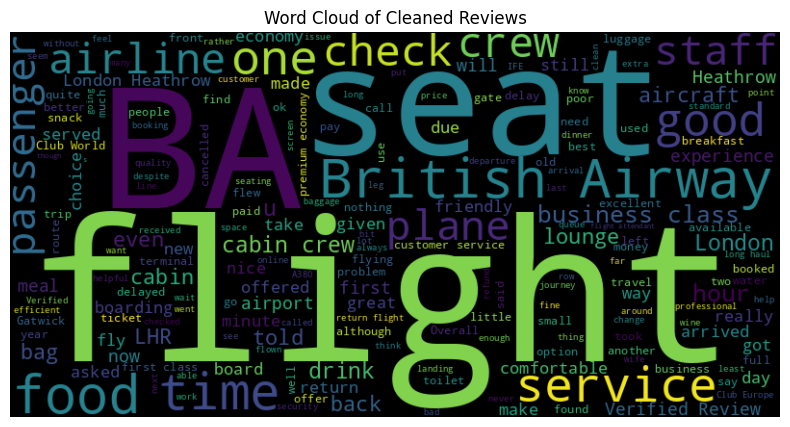

In [47]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#combine all cleaned reviews into a single string
reviews = " ".join(review for review in df['cleaned_reviews'])

#create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='viridis').generate(reviews)

#display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Cleaned Reviews')
plt.savefig('/content/gdrive/My Drive/figs/ba_wordcloud.png')
plt.show()

**SENTIMENT ANALYSIS**

In [48]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

#download VADER lexicon
nltk.download('vader_lexicon')

#initialize the VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

#apply VADER sentiment analysis
df['sentiment_scores'] = df['cleaned_reviews'].apply(lambda review: sia.polarity_scores(review))

#extract compound score as a single sentiment value
df['compound_sentiment'] = df['sentiment_scores'].apply(lambda score_dict: score_dict['compound'])


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


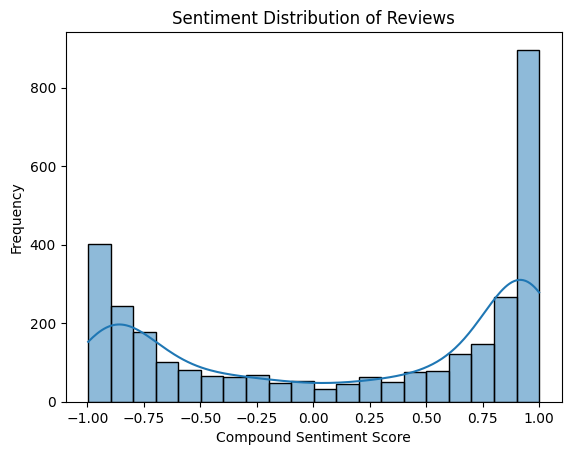

In [49]:
#visualize
import seaborn as sns
import matplotlib.pyplot as plt

#plot histogram for compound sentiment scores
sns.histplot(df['compound_sentiment'], kde=True, bins=20)
plt.title('Sentiment Distribution of Reviews')
plt.xlabel('Compound Sentiment Score')
plt.ylabel('Frequency')
plt.show()


In [50]:
#categorize segments
def categorize_sentiment(compound):
    if compound > 0.05:
        return 'Positive'
    elif compound < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

#apply categorization function
df['sentiment_category'] = df['compound_sentiment'].apply(categorize_sentiment)

#count the occurrences of each category
sentiment_counts = df['sentiment_category'].value_counts()
print(sentiment_counts)

sentiment_category
Positive    1763
Negative    1278
Neutral       39
Name: count, dtype: int64


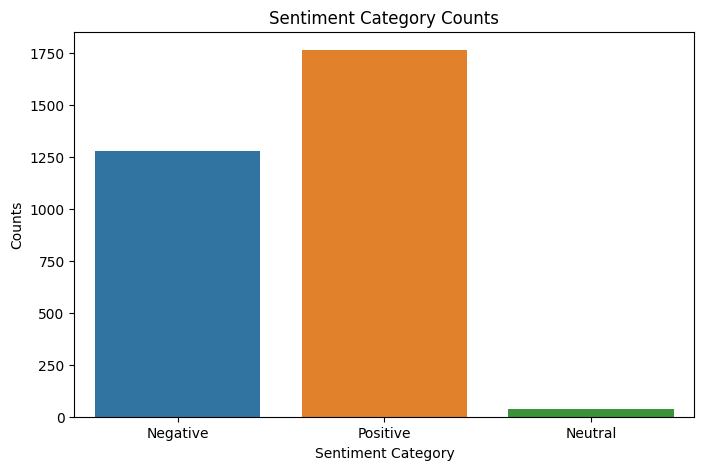

In [51]:
#visualize sentiment counts
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='sentiment_category', palette='tab10')
plt.xlabel('Sentiment Category')
plt.ylabel('Counts')
plt.title('Sentiment Category Counts')
plt.savefig('/content/gdrive/My Drive/figs/ba_sentiment.png')
plt.show()

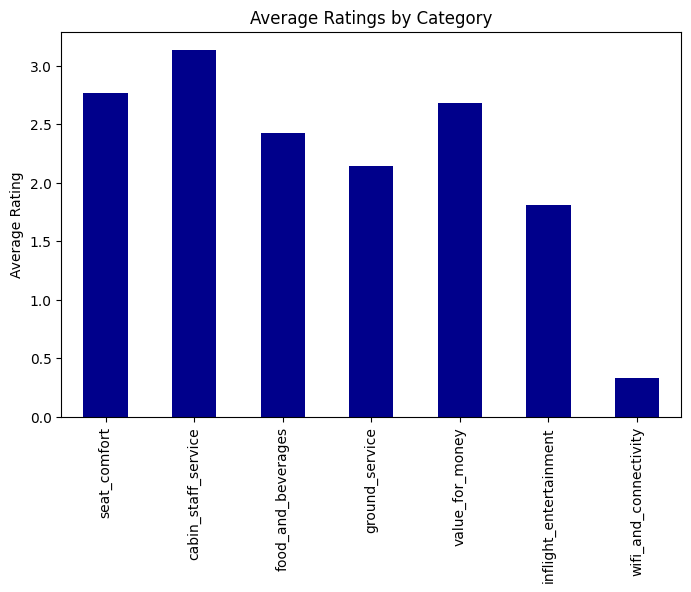

In [52]:
#average rating by category
categories = ['seat_comfort', 'cabin_staff_service', 'food_and_beverages',
              'ground_service', 'value_for_money', 'inflight_entertainment',
              'wifi_and_connectivity']
avg_ratings = df[categories].mean()

#bar plot
plt.figure(figsize=(8, 5))
avg_ratings.plot(kind='bar', color='darkblue', title='Average Ratings by Category')
plt.ylabel('Average Rating')
plt.savefig('/content/gdrive/My Drive/figs/ba_average_ratings.png')
plt.show()

**TOPIC MODELLING**

In [53]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

#create an object of count vectorizer
vect = CountVectorizer()

#apply transformation
tf = vect.fit_transform(df).toarray()
tf_feature_names = vect.get_feature_names_out()

#declare the number of topics
number_of_topics = 8

lda_model = LatentDirichletAllocation(n_components=number_of_topics, random_state=0)

#fit the term frequency data to the model
lda_model.fit(tf)

#create empty dictionary to store key value pair of topic number and its weights
topic_dict = {}

#loop through model components
for topic_idx, topic in enumerate(lda_model.components_):
    topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(tf_feature_names[i])
            for i in topic.argsort()[:-10 - 1:-1]]
    topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
            for i in topic.argsort()[:-10 - 1:-1]]

df_topic =pd.DataFrame(topic_dict)

In [54]:
df_topic

,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights,Topic 2 words,Topic 2 weights,Topic 3 words,Topic 3 weights,Topic 4 words,Topic 4 weights,Topic 5 words,Topic 5 weights,Topic 6 words,Topic 6 weights,Topic 7 words,Topic 7 weights
0,inflight_entertainment,1.1,reviews,0.1,seat_comfort,1.1,type_of_traveller,1.1,wifi_and_connectivity,1.1,country,1.1,compound_sentiment,1.1,sentiment_scores,1.1
1,sentiment_category,1.1,cabin_staff_service,0.1,rating_score,1.1,food_and_beverages,1.1,route,1.1,inflight_entertainment,0.1,date,1.1,inflight_entertainment,0.1
2,cabin_staff_service,1.1,cleaned_reviews,0.1,inflight_entertainment,0.1,ground_service,1.1,cabin_staff_service,0.1,reviews,0.1,value_for_money,1.1,reviews,0.1
3,reviews,1.1,sentiment_category,0.1,reviews,0.1,inflight_entertainment,0.1,cleaned_reviews,0.1,cabin_staff_service,0.1,inflight_entertainment,0.1,cabin_staff_service,0.1
4,cabin_flown,1.1,inflight_entertainment,0.1,cabin_staff_service,0.1,reviews,0.1,reviews,0.1,cleaned_reviews,0.1,reviews,0.1,cleaned_reviews,0.1
5,cleaned_reviews,1.1,cabin_flown,0.1,cleaned_reviews,0.1,cabin_staff_service,0.1,inflight_entertainment,0.1,cabin_flown,0.1,cabin_staff_service,0.1,cabin_flown,0.1
6,ground_service,0.1,ground_service,0.1,cabin_flown,0.1,cleaned_reviews,0.1,sentiment_category,0.1,sentiment_category,0.1,cleaned_reviews,0.1,sentiment_category,0.1
7,food_and_beverages,0.1,value_for_money,0.1,sentiment_category,0.1,cabin_flown,0.1,cabin_flown,0.1,food_and_beverages,0.1,cabin_flown,0.1,ground_service,0.1
8,value_for_money,0.1,food_and_beverages,0.1,ground_service,0.1,sentiment_category,0.1,ground_service,0.1,date,0.1,sentiment_category,0.1,value_for_money,0.1
9,date,0.1,date,0.1,food_and_beverages,0.1,value_for_money,0.1,value_for_money,0.1,value_for_money,0.1,ground_service,0.1,food_and_beverages,0.1


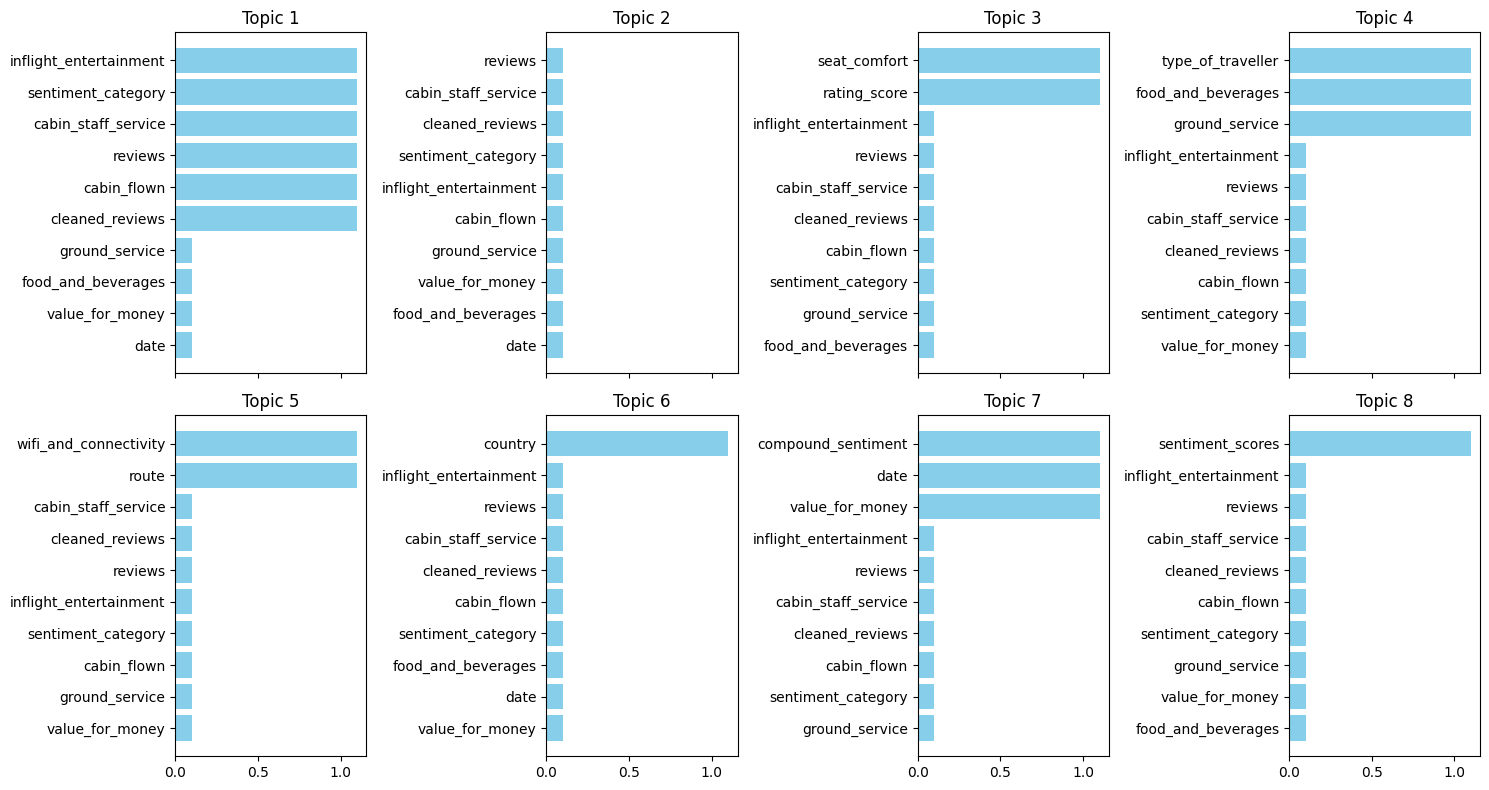

In [55]:
#visualize
#define number of topics and words per topic
num_topics = lda_model.n_components
num_top_words = 10

#plot each topic with its top words
fig, axes = plt.subplots(2, 4, figsize=(15, 8), sharex=True)
axes = axes.flatten()

for idx in range(num_topics):
    ax = axes[idx]
    word_labels = df_topic[f"Topic {idx} words"][:num_top_words]
    word_weights = [float(w) for w in df_topic[f"Topic {idx} weights"][:num_top_words]]
    ax.barh(word_labels, word_weights, color='skyblue')
    ax.set_title(f'Topic {idx + 1}')
    ax.invert_yaxis()

#adjust layout to prevent overlap
plt.tight_layout()
plt.savefig('/content/gdrive/My Drive/figs/ba_topics.png')
plt.show()